<a href="https://colab.research.google.com/github/nyee88/Brilliant/blob/main/OCSR-CLIP/OCSR-CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Generate a tiny toy dataset of molecule image + graph pairs from SMILES using RDKit

# Install RDKit (Colab)
!pip install rdkit -q

import os, json
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# 1) A tiny hard-coded SMILES list (replace these with whatever you want)
smiles_list = {
    "benzene": "c1ccccc1",
    "thiophene": "c1ccsc1",
    "pyridine": "c1ccncc1",
    "aniline": "Nc1ccccc1",
    "benzoic_acid": "OC(=O)c1ccccc1",
    "furan": "c1ccoc1",
    "DPP_core": "O=C1C(C2=CN1)=CNC2=O",
    "ethyl_acetate": "CCOC(=O)C",
    "acetic_acid": "CC(=O)O",
    "toluene": "Cc1ccccc1",
}

# 2) Make output folder
out_dir = "clip_molecule_pairs"
os.makedirs(out_dir, exist_ok=True)

# 3) Helper to build a simple graph representation
def mol_to_graph_dict(mol):
    atoms = []
    for atom in mol.GetAtoms():
        atoms.append({
            "idx": atom.GetIdx(),
            "symbol": atom.GetSymbol(),
            "atomic_num": atom.GetAtomicNum(),
            "degree": atom.GetDegree(),
            "is_aromatic": atom.GetIsAromatic(),
            "is_in_ring": atom.IsInRing(),
            "formal_charge": atom.GetFormalCharge(),
        })

    bonds = []
    for bond in mol.GetBonds():
        bonds.append({
            "begin": bond.GetBeginAtomIdx(),
            "end": bond.GetEndAtomIdx(),
            "bond_type": str(bond.GetBondType()),  # e.g. SINGLE, DOUBLE, AROMATIC
            "is_in_ring": bond.IsInRing(),
        })

    # adjacency matrix for convenience
    adj = Chem.GetAdjacencyMatrix(mol).tolist()

    return {
        "atoms": atoms,
        "bonds": bonds,
        "adjacency": adj,
    }

# 4) Loop over SMILES, sanitize, draw PNG, save graph as JSON
for name, smi in smiles_list.items():
    print(f"Processing {name}: {smi}")
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        print(f"  [!] Failed to parse SMILES for {name}, skipping.")
        continue

    try:
        Chem.SanitizeMol(mol)
    except Exception as e:
        print(f"  [!] Sanitization failed for {name}: {e}")
        continue

    # Compute 2D coordinates for nicer drawings
    AllChem.Compute2DCoords(mol)

    # 4a) Save 2D structure PNG
    png_path = os.path.join(out_dir, f"{name}.png")
    Draw.MolToFile(mol, png_path, size=(300, 300))
    print(f"  [+] Saved image to {png_path}")

    # 4b) Save graph representation as JSON
    graph = mol_to_graph_dict(mol)
    graph_path = os.path.join(out_dir, f"{name}_graph.json")
    with open(graph_path, "w") as f:
        json.dump({
            "name": name,
            "smiles": smi,
            "graph": graph,
        }, f, indent=2)
    print(f"  [+] Saved graph to {graph_path}")

print("\nDone. Check the 'clip_molecule_pairs' folder for PNGs + JSON graphs.")

Processing benzene: c1ccccc1
  [+] Saved image to clip_molecule_pairs/benzene.png
  [+] Saved graph to clip_molecule_pairs/benzene_graph.json
Processing thiophene: c1ccsc1
  [+] Saved image to clip_molecule_pairs/thiophene.png
  [+] Saved graph to clip_molecule_pairs/thiophene_graph.json
Processing pyridine: c1ccncc1
  [+] Saved image to clip_molecule_pairs/pyridine.png
  [+] Saved graph to clip_molecule_pairs/pyridine_graph.json
Processing aniline: Nc1ccccc1
  [+] Saved image to clip_molecule_pairs/aniline.png
  [+] Saved graph to clip_molecule_pairs/aniline_graph.json
Processing benzoic_acid: OC(=O)c1ccccc1
  [+] Saved image to clip_molecule_pairs/benzoic_acid.png
  [+] Saved graph to clip_molecule_pairs/benzoic_acid_graph.json
Processing furan: c1ccoc1
  [+] Saved image to clip_molecule_pairs/furan.png
  [+] Saved graph to clip_molecule_pairs/furan_graph.json
Processing DPP_core: O=C1C(C2=CN1)=CNC2=O
  [+] Saved image to clip_molecule_pairs/DPP_core.png
  [+] Saved graph to clip_mol

Files in clip_molecule_pairs
  DPP_core.png
  DPP_core_graph.json
  acetic_acid.png
  acetic_acid_graph.json
  aniline.png
  aniline_graph.json
  benzene.png
  benzene_graph.json
  benzoic_acid.png
  benzoic_acid_graph.json
  ethyl_acetate.png
  ethyl_acetate_graph.json
  furan.png
  furan_graph.json
  pyridine.png
  pyridine_graph.json
  thiophene.png
  thiophene_graph.json
  toluene.png
  toluene_graph.json

Showing image for: benzene


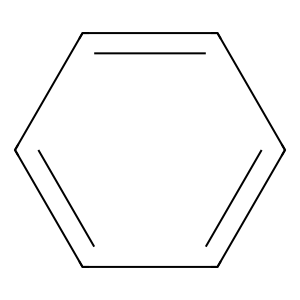


Graph JSON for: benzene
SMILES: c1ccccc1

First few atoms:
{'idx': 0, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 1, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 2, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 3, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}
{'idx': 4, 'symbol': 'C', 'atomic_num': 6, 'degree': 2, 'is_aromatic': True, 'is_in_ring': True, 'formal_charge': 0}

First few bonds:
{'begin': 0, 'end': 1, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 1, 'end': 2, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 2, 'end': 3, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 3, 'end': 4, 'bond_type': 'AROMATIC', 'is_in_ring': True}
{'begin': 4, 'end': 5, 'bond_type': 'AROMATIC', 'is_in_ring': Tru

In [ ]:
import os, json
from IPython.display import Image, display

out_dir = "clip_molecule_pairs"

# List what's in the folder
print("Files in", out_dir)
for fname in sorted(os.listdir(out_dir)):
    print(" ", fname)

# Pick one example molecule to inspect
example_name = "benzene"  # change to "DPP_core" or others if you like

png_path = os.path.join(out_dir, f"{example_name}.png")
json_path = os.path.join(out_dir, f"{example_name}_graph.json")

print(f"\nShowing image for: {example_name}")
display(Image(filename=png_path))

print(f"\nGraph JSON for: {example_name}")
with open(json_path, "r") as f:
    graph_data = json.load(f)

# Print a small, human-readable summary
print("SMILES:", graph_data["smiles"])
print("\nFirst few atoms:")
for atom in graph_data["graph"]["atoms"][:5]:
    print(atom)

print("\nFirst few bonds:")
for bond in graph_data["graph"]["bonds"][:5]:
    print(bond)


In [ ]:
# 3) Toy “Chemical CLIP referee”: fake embeddings + cosine similarity demo

import os, json, glob
import numpy as np

out_dir = "clip_molecule_pairs"

# ---- Load graph JSONs --------------------------------------------------------
def load_graph_jsons(out_dir):
    mols = []
    for path in sorted(glob.glob(os.path.join(out_dir, "*_graph.json"))):
        with open(path, "r") as f:
            data = json.load(f)
        mols.append(data)
    return mols

molecules = load_graph_jsons(out_dir)
print(f"Loaded {len(molecules)} molecules from {out_dir}")

# ---- Very simple “structure encoder” -----------------------------------------
def simple_graph_embedding(graph_record):
    """
    Turn our RDKit-derived graph JSON into a tiny numeric vector.
    This is just a hand-crafted stand-in for a real GNN.
    """
    atoms = graph_record["graph"]["atoms"]
    bonds = graph_record["graph"]["bonds"]

    # Element counts (extend if you like)
    elements = ["C", "N", "O", "S", "F", "Cl", "Br", "I"]
    elem_counts = [
        sum(1 for a in atoms if a["symbol"] == el) for el in elements
    ]

    # Bond type counts
    bond_types = ["SINGLE", "DOUBLE", "TRIPLE", "AROMATIC"]
    bond_counts = [
        sum(1 for b in bonds if b["bond_type"] == bt) for bt in bond_types
    ]

    vec = np.array(elem_counts + bond_counts, dtype=np.float32)

    # L2-normalize so cosine similarity behaves nicely
    norm = np.linalg.norm(vec) + 1e-8
    return vec / norm

structure_embeddings = {}
for m in molecules:
    name = m["name"]
    emb = simple_graph_embedding(m)
    structure_embeddings[name] = emb

print("Structure embeddings for:", list(structure_embeddings.keys()))

# ---- Fake “image encoder” ----------------------------------------------------
# For now, pretend the image encoder gives almost the same vector + small noise.
rng = np.random.default_rng(0)

image_embeddings = {}
for name, emb in structure_embeddings.items():
    noise = rng.normal(scale=0.05, size=emb.shape)
    img_emb = emb + noise
    # re-normalize
    img_emb = img_emb / (np.linalg.norm(img_emb) + 1e-8)
    image_embeddings[name] = img_emb

# ---- Cosine similarity + candidate scoring -----------------------------------
def cosine_similarity(a, b):
    a = np.asarray(a, dtype=np.float32)
    b = np.asarray(b, dtype=np.float32)
    denom = (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8)
    return float(np.dot(a, b) / denom)

def score_candidates(query_image_name, candidate_names):
    """
    Given an image (by name) and a list of candidate structure names,
    return a sorted list of (name, cosine_similarity) pairs.
    """
    q = image_embeddings[query_image_name]
    scores = []
    for cand in candidate_names:
        s = cosine_similarity(q, structure_embeddings[cand])
        scores.append((cand, s))
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores

# ---- Demo: “benzene” image vs all candidate structures -----------------------
query = "benzene"  # change to any name present in clip_molecule_pairs
candidates = list(structure_embeddings.keys())

print(f"\nCosine similarity scores for image='{query}' vs candidate structures:")
for name, score in score_candidates(query, candidates):
    flag = "  <--- correct" if name == query else ""
    print(f"{name:15s}  sim={score: .3f}{flag}")


Loaded 10 molecules from clip_molecule_pairs
Structure embeddings for: ['DPP_core', 'acetic_acid', 'aniline', 'benzene', 'benzoic_acid', 'ethyl_acetate', 'furan', 'pyridine', 'thiophene', 'toluene']

Cosine similarity scores for image='benzene' vs candidate structures:
thiophene        sim= 0.986
benzene          sim= 0.983  <--- correct
furan            sim= 0.981
pyridine         sim= 0.978
aniline          sim= 0.971
toluene          sim= 0.970
benzoic_acid     sim= 0.935
ethyl_acetate    sim= 0.435
acetic_acid      sim= 0.375
DPP_core         sim= 0.373


--- SANITY CHECK START ---

ORIGINAL (True):  c1ccccc1
MUTATED  (False): C1=C=CC=CC=1
ANCHOR IMAGE (Should be blurry/rotated):


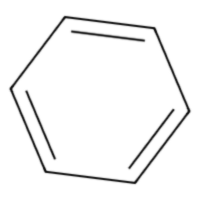

----------------------------------------
ORIGINAL (True):  CC(=O)Oc1ccccc1C(=O)O
MUTATED  (False): CC(=O)Oc1cnccc1C(=O)O
ANCHOR IMAGE (Should be blurry/rotated):


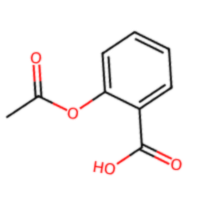

----------------------------------------
ORIGINAL (True):  CCO
MUTATED  (False): CC=O
ANCHOR IMAGE (Should be blurry/rotated):


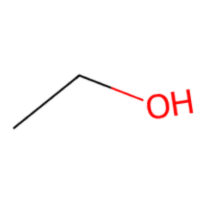

----------------------------------------


In [10]:
## This cell defines the logic for creating your training triplets and runs a sanity check.
## It creates two functions: one that chemically mutates a SMILES string (to create the "Hard Negative") and another that visually degrades an image (to create the "Messy Anchor").
## Finally, it runs these functions on three test molecules (Benzene, Aspirin, Ethanol) and displays the results so you  can verify the "messiness" and "chemical trickery" before generating the full dataset.

import random
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image, ImageFilter
from IPython.display import display

# --- 1. THE MUTATION LOGIC (The "Trap") ---
def mutate_molecule_hard(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if not mol: return None
    try:
        Chem.Kekulize(mol, clearAromaticFlags=True)
    except:
        return None
    rw_mol = Chem.RWMol(mol)

    # Try swapping a Carbon for Nitrogen (Atom Swap)
    if random.random() < 0.5:
        atoms = [a for a in rw_mol.GetAtoms() if a.GetSymbol() == 'C']
        if atoms:
            atom = random.choice(atoms)
            atom.SetAtomicNum(7)
            try:
                Chem.SanitizeMol(rw_mol)
                return Chem.MolToSmiles(rw_mol)
            except: pass

    # Try flipping a bond (Single <-> Double)
    bonds = rw_mol.GetBonds()
    if bonds:
        bond = random.choice(bonds)
        new_type = None
        if bond.GetBondType() == Chem.BondType.SINGLE:
            new_type = Chem.BondType.DOUBLE
        elif bond.GetBondType() == Chem.BondType.DOUBLE:
            new_type = Chem.BondType.SINGLE

        if new_type:
            bond.SetBondType(new_type)
            try:
                Chem.SanitizeMol(rw_mol)
                return Chem.MolToSmiles(rw_mol)
            except: pass
    return None

# --- 2. THE VISUAL DEGRADATION (The "Mess") ---
def degrade_image(pil_image):
    img = pil_image.convert("RGB")
    # Rotate
    img = img.rotate(random.uniform(-10, 10), resample=Image.BICUBIC, fillcolor='white')
    # Blur
    img = img.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 0.8)))
    return img

# --- 3. SANITY CHECK (Run on 3 examples) ---
test_smiles = [
    "c1ccccc1",             # Benzene
    "CC(=O)Oc1ccccc1C(=O)O",# Aspirin
    "CCO"                   # Ethanol
]

print("--- SANITY CHECK START ---\n")
for smi in test_smiles:
    neg = mutate_molecule_hard(smi)
    if not neg:
        print(f"Could not mutate {smi}, skipping...")
        continue

    # Generate Anchor Image
    mol = Chem.MolFromSmiles(smi)
    clean = Draw.MolToImage(mol, size=(200, 200))
    shitty = degrade_image(clean)

    print(f"ORIGINAL (True):  {smi}")
    print(f"MUTATED  (False): {neg}")
    print("ANCHOR IMAGE (Should be blurry/rotated):")
    display(shitty)
    print("-" * 40)